# DS 3000 - Assignment [13]

**Student Name**: [Vidushi Misra, Hailey Richardson, Alex Vuong, Brian Wong]

**Date**: [4/4/2025]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

___________________________________________________________________________



**Question 1 — The DS Problem (0 point)**

In your own words, formulate the Data Science problem.

Our data science problem is to build a machine learning model that can predict an individual's diabetes status--which is categorized as either diabetic, pre-diabetic, or no diabetes--based on a variety of health-related indicators collected through the CDC's Behavioral Risk Factor Surveillance System (BRFSS).

**Question 2 — Prepare the Data (5 pts)**

- Evaluate the dataset to determine if **ALL variables are represented in their expected type**. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.

In [ ]:
import pandas as pd
import gdown

file_id = "1DV6XCbSZYTTAmoAQA7iKI9FtmpFNYm9U"
output = "diabetes_012_health_indicators_BRFSS2015.csv"

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}",
               output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=1DV6XCbSZYTTAmoAQA7iKI9FtmpFNYm9U
To: /workspaces/mktg_codespace/diabetes_012_health_indicators_BRFSS2015.csv
100%|██████████| 22.7M/22.7M [00:00<00:00, 98.5MB/s]


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Convert variables to suitable data types
df['Diabetes_012'] = df['Diabetes_012'].astype('category')
df['HighBP'] = df['HighBP'].astype('category')
df['HighChol'] = df['HighChol'].astype('category')
df['CholCheck'] = df['CholCheck'].astype('category')
df['Smoker'] = df['Smoker'].astype('category')
df['Stroke'] = df['Stroke'].astype('category')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('category')
df['PhysActivity'] = df['PhysActivity'].astype('category')
df['Fruits'] = df['Fruits'].astype('category')
df['Veggies'] = df['Veggies'].astype('category')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('category')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('category')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('category')
df['GenHlth'] = df['GenHlth'].astype(int)
df['MentHlth'] = df['MentHlth'].astype(int)
df['PhysHlth'] = df['PhysHlth'].astype(int)
df['DiffWalk'] = df['DiffWalk'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype(int)
df['Education'] = df['Education'].astype(int)
df['Income'] = df['Income'].astype(int)

HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, and Sex were all converted to type category because they values are either 1 or 0.

Diabetes_012 was also converted to type category because it is either 0, 1, or 2.

GenHlth, MentHlth, and PhysHlth were all converted to type int because GenHlth's values are a discrete set of integers from 1 to 5, and the other two's values are on a discrete set of integers from 1 to 30.

Age, Education, and Income were also converted to type int because they all had values on a discrete set of integers.

In [ ]:
# Check for missing values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Check for invalid values:
invalid_values = {
    "Diabetes_012": ~(df["Diabetes_012"].isin([0, 1, 2])),
    "HighBP": ~(df["HighBP"].isin([0, 1])),
    "HighChol": ~(df["HighChol"].isin([0, 1])),
    "CholCheck": ~(df["CholCheck"].isin([0, 1])),
    "BMI": df["BMI"] <= 0,
    "Smoker": ~(df["Smoker"].isin([0, 1])),
    "Stroke": ~(df["Stroke"].isin([0, 1])),
    "HeartDiseaseorAttack": ~(df["HeartDiseaseorAttack"].isin([0, 1])),
    "PhysActivity": ~(df["PhysActivity"].isin([0, 1])),
    "Fruits": ~(df["Fruits"].isin([0, 1])),
    "Veggies": ~(df["Veggies"].isin([0, 1])),
    "HvyAlcoholConsump": ~(df["HvyAlcoholConsump"].isin([0, 1])),
    "AnyHealthcare": ~(df["AnyHealthcare"].isin([0, 1])),
    "NoDocbcCost": ~(df["NoDocbcCost"].isin([0, 1])),
    "GenHlth": ~(df["GenHlth"].isin([1, 2, 3, 4, 5])),
    "MentHlth": ~df["MentHlth"].between(0, 30),
    "PhysHlth": ~df["PhysHlth"].between(0, 30),
    "DiffWalk": ~(df["DiffWalk"].isin([0, 1])),
    "Sex": ~(df["Sex"].isin([0, 1])),
    "Age": ~(df["Age"].between(1, 13)),
    "Education": ~(df["Education"].between(1, 6)),
    "Income": ~(df["Income"].between(1, 8))
}

# Check invalid values in each column
for col, condition in invalid_values.items():
    count = df[condition].shape[0]
    print(f"Invalid values in {col}: {count}")

Invalid values in Diabetes_012: 0
Invalid values in HighBP: 0
Invalid values in HighChol: 0
Invalid values in CholCheck: 0
Invalid values in BMI: 0
Invalid values in Smoker: 0
Invalid values in Stroke: 0
Invalid values in HeartDiseaseorAttack: 0
Invalid values in PhysActivity: 0
Invalid values in Fruits: 0
Invalid values in Veggies: 0
Invalid values in HvyAlcoholConsump: 0
Invalid values in AnyHealthcare: 0
Invalid values in NoDocbcCost: 0
Invalid values in GenHlth: 0
Invalid values in MentHlth: 0
Invalid values in PhysHlth: 0
Invalid values in DiffWalk: 0
Invalid values in Sex: 0
Invalid values in Age: 0
Invalid values in Education: 0
Invalid values in Income: 0


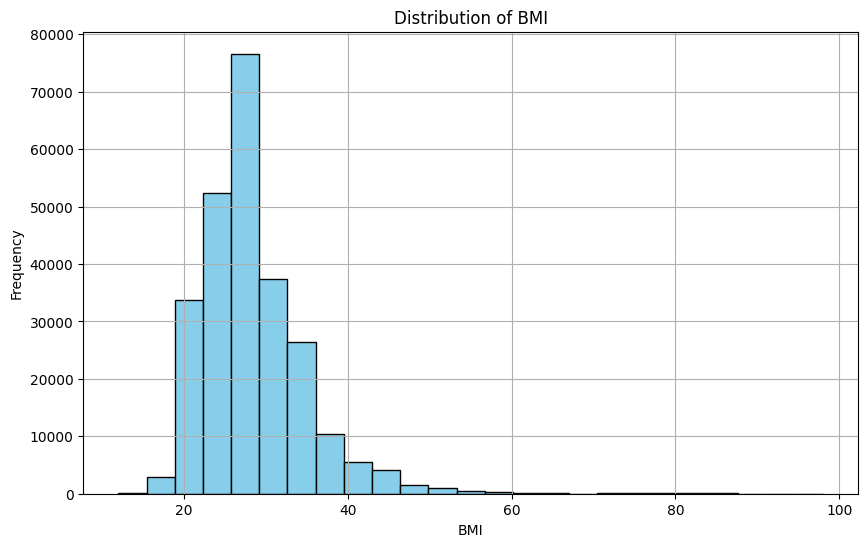

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [ ]:
# check for outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["BMI"], bins=25, color='skyblue', edgecolor='black')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

df["BMI"].describe()

In [ ]:
# Remove outliers

# Calculate the IQR
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers before replacement
outliers_before = df[(df["BMI"] < lower_bound) | (df["BMI"] > upper_bound)]

# Print the number of outliers before replacing
print(f"Number of outliers in BMI before replacement: {outliers_before.shape[0]}")

# Calculate the median of BMI
median_bmi = df["BMI"].median()

# Replace outliers with the median by directly indexing the rows
df.loc[df["BMI"] < lower_bound, "BMI"] = median_bmi
df.loc[df["BMI"] > upper_bound, "BMI"] = median_bmi

Number of outliers in BMI before replacement: 9847


There were 9847 out of 253680 data points for BMI that we considered outliers, which is only 3.89% of values, so it isn't a widespread issue. Since it isn't a widespread issue, we decided to perform imputation by replacing outliers with the median BMI value.

**Question 3 — (20 points)**

- Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

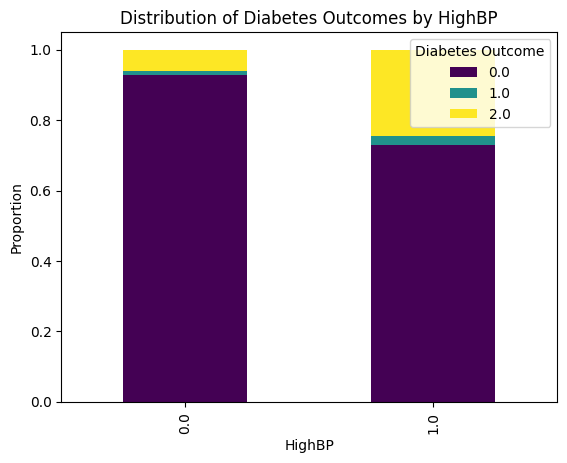

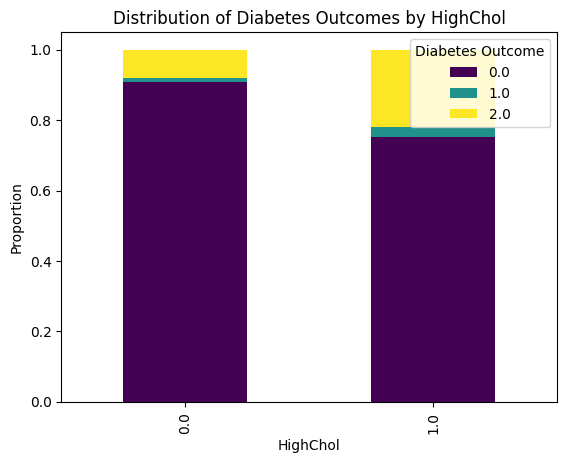

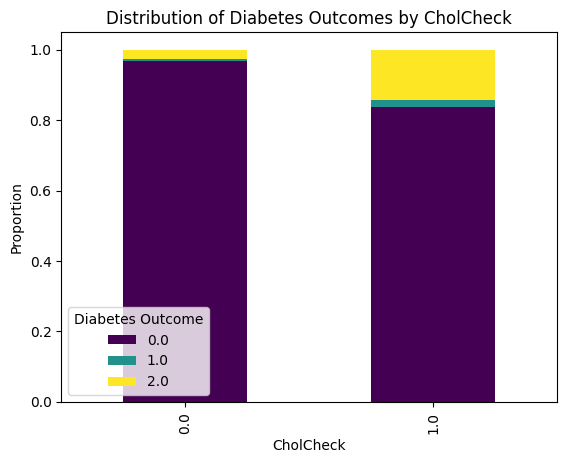

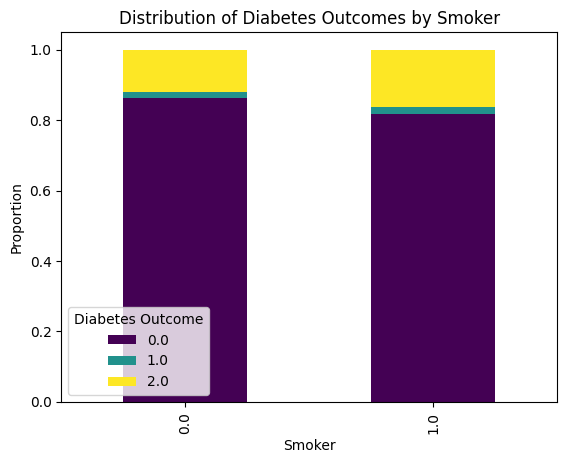

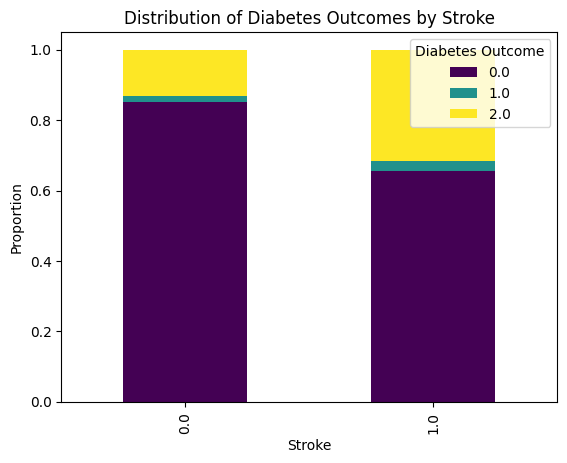

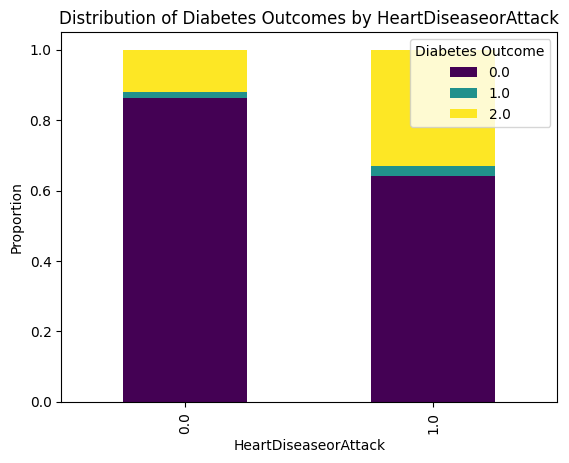

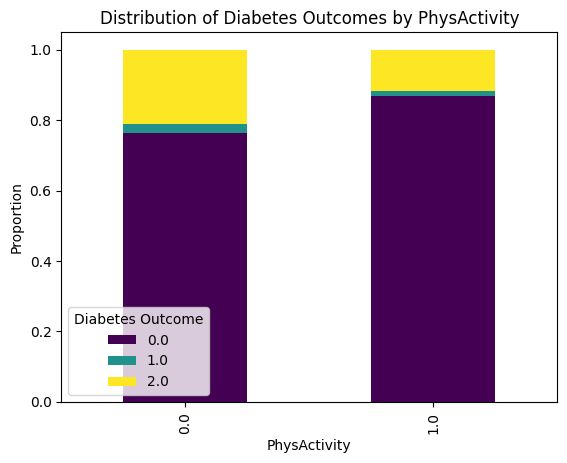

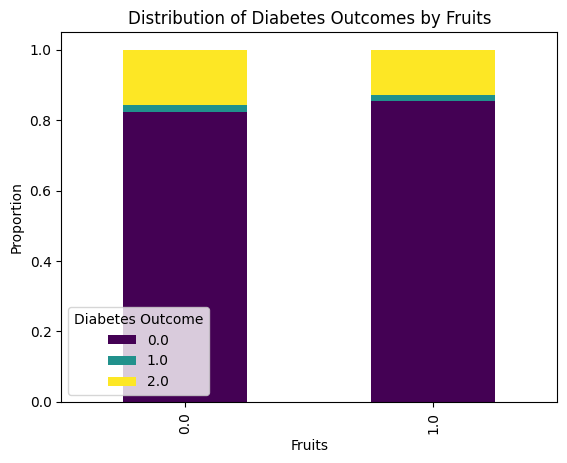

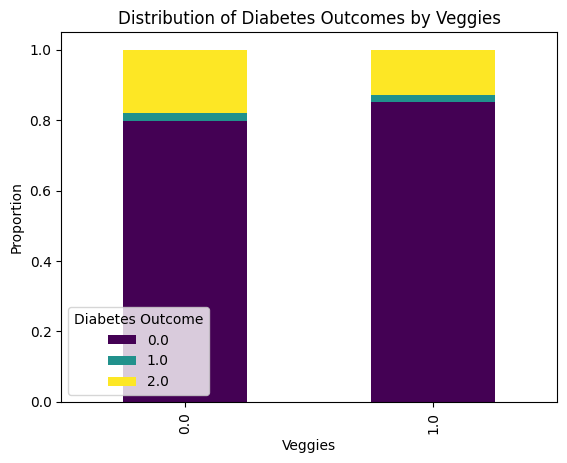

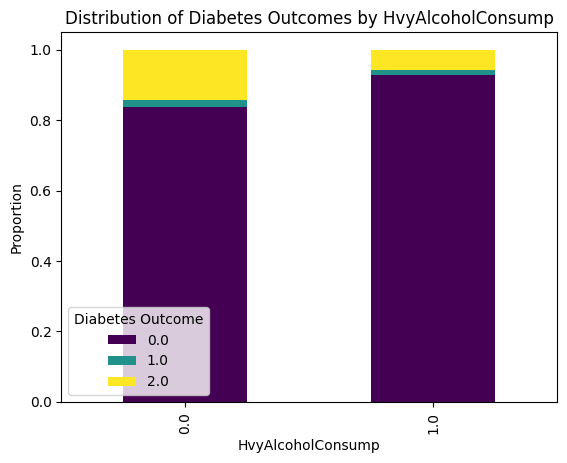

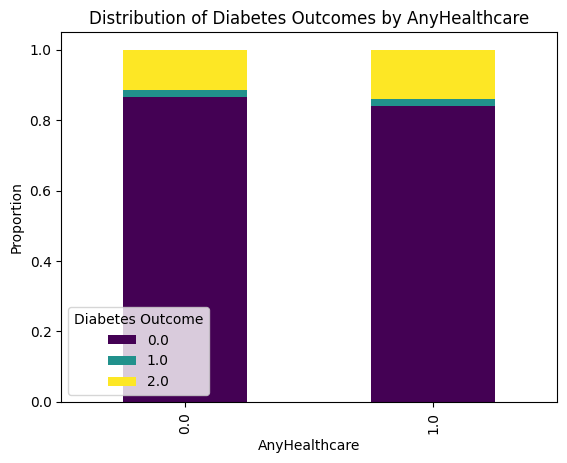

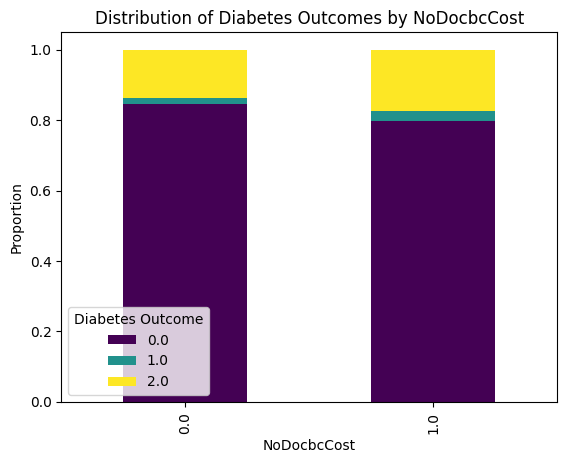

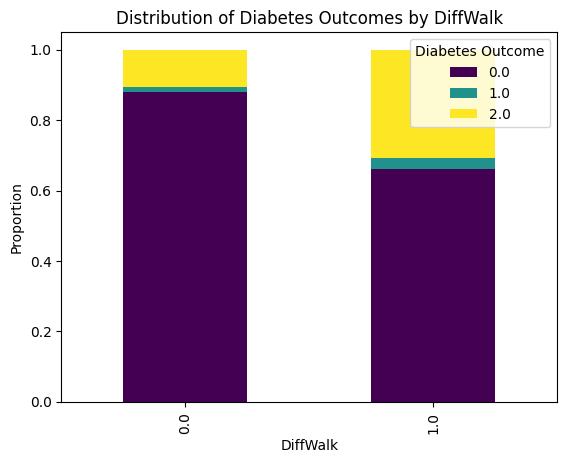

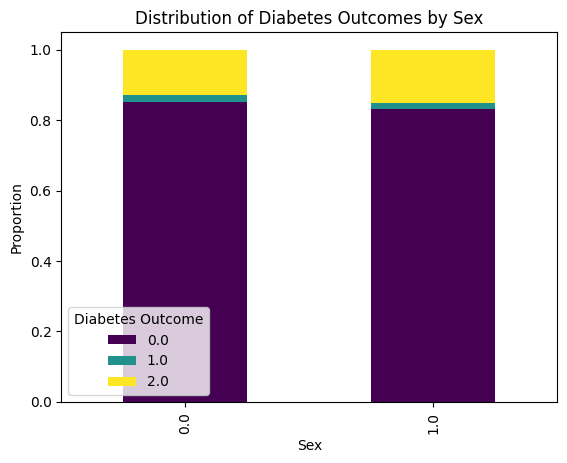

In [ ]:
# Loop through each categorical columns and generate stacked bar plots
categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    if col != 'Diabetes_012':
        crosstab = pd.crosstab(df[col], df['Diabetes_012'], normalize='index')
        crosstab.plot(kind='bar', stacked=True, colormap='viridis')
        plt.title(f'Distribution of Diabetes Outcomes by {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='Diabetes Outcome')
        plt.show()

In all the graphs, purple represents no diabetes, blue represents pre-diabetes, and yellow represents diabetes, and the y-axis represents proportion from 0 to 1.0.

In the "Distribution of Diabetes Outcomes by HighBP," where 0 means no high blood pressure and 1 represents high blood pressure on the x-axis, it seems like people who do have high blood pressure does have a higher chance of getting pre-diabetes and diabetes as the proportion of peoplewith pre-diabetes and diabetes who responded 1 are greater than those who responded 0.

In the "Distribution of Diabetes Outcomes by HighChol," where 0 means no high cholesterol and 1 means high cholesterol on the x-axis, it seems like people who have high cholesterol have a high chance of getting pre-diabetes and diabetes as the proportion of people with pre-diabetes and diabetes for people who responded 1 are greater than those who responded 0.

In the "Distribution of Diabetes Outcomes by CholCheck," where 0 means no cholesterol check in 5 years and 1 means yes cholesterol check in 5 years on the x-aixs, it seems like people who have done cholestrol checks have a higher chance of getting pre-diabetes and diabetes as the proportion of people who did do cholesterol checks with pre-diabetes and diabetes are greater than those who responded 0.

In the "Distribution of Diabetes Outcomes by Smoker," where 0 means the person has not smoked at least 100 cigarettes in their entire life and 1 represents the opposite on the x=axis, it seems like people who responded 1 have a slighly higher chance of getting pre-diabetes and diabetes as the proportion of peolpe who responded 1 had slightly larger proportions for pre-diabetes and diabetes than those who responded with 0.

In the "Distribution of Diabetes Outcomes by Stroke," where 0 means the person never had a stroke and 1 represents the opposite on the x-axis, it seems like people who responded with 1 have a much higher chance of getting pre-diabetes and diabetes as the proportion of people who responded with 1 had a much larger proportion for pre-diabetes and diabetes than those who responded with 0.

In the "Distribution of Diabetes Outcomes by HeartDiseaseorAttack," where 0 means the person doesn't have coronary heart disease (CHD) or myocardial infarction (MI) and 1 means the person does have CHD or MI on the x-axis, it seems like people who responded with 1 have a much higher chance of getting pre-disabetes and diabetes as the proportion of people who responded with 1 had a much larger proportion for pre-diabetes and diabetes than those who responded with 0.

In the "Distribution of Diabetes Outcomes by PhysActivity," where 0 means the person does not do physical activity in the past 30 days, not including their job, and 1 means the person does do physical activity in the past 30 days, not including their job, in the x-axis, it seems like people who responded with 0 have a much higher chance of getting pre-diabetes and diabetes as the proportion of people who responded with 0 had a much larger proportion for pre-diabetes and diabetes than those who responded with 1.

In the "Distribution of Diabetes Outcomes by Fruits," where 0 means the person doesn't consume fruits one or more time per day and 1 represents the opposite on the x-axis, it seems like people who responded with 0 had a slightly higher chance of getting diabetes as the proportion of people who responded with 0 had a slightly larger proportion for diabetes than those who responded with 1.

In the "Distribution of Diabetes Outcomes by Veggies," where 0 means the person doesn't consume vegetables one or more time per day and 1 represents the opposite on the x-axis, it seems like people who responded with 0 had a moderately higher chance of getting diabetes as the proportion of people who responded with 0 had a slightly larger proportion for diabetes than those who responded with 1.

In the "Distribution of Diabetes Outcomes by HvyAlcoholConsump," where 0 represents not being a heavy drinker (adult men having less than 14 drinks per week and adult women having less than 7 drinks per week)  and 1 represents the opposite on the x-axis, it seems like people who responded with 0 had a much higher chance of getting diabetes as the proportion of people who responded with 0 had a much larger proportion for diabetes than those who responded with 1.

In the "Distribution of Diabetes Outcomes by AnyHealthcare," where 0 represents not having any health care coverage and 1 represents the opposite on the x-axis, it seems like people who responded with 1 had a slightly larger chance of getting diabetes as the proportion of people who responded with 1 had a slightly larger proportion for diabetes than those who responded with 0.

In the "Distribution of Diabetes Outcomes by NoDocbcCost," where 0 represents not having a time in the past 12 months when a person needed to see a doctor but could not because of cost and 1 represents the opposite on the x-axis, it seems like people who responded with 1 had a slightly higher chance of getting pre-diabetes and diabetes than people who responded with 0 as the proportion for diabetes and pre-diabetes for people who responded 1 was slightly larger than people who responded with 0.

In the "Distribution of Diabetes Outcomes by DiffWalk," where 0 represents no serious difficulty walking or climbing stairs and 1 represents the opposite on the x-axis, it seems like people who do have serious difficulty walking or climbing stairs seem have have a higher chance of having pre-diabetes and a much higher chance of getting diabetes as the proportion of people with diabetes and have difficulty walking is nearly double that of people without difficulty walking and has diabetes.

In the "Distribution of Diabetes Outcomes by Sex," where 0 represents female and 1 represents male on the x-axis, it seems like the diabetes outcome are about the same for males and females as the proportion of males and females that have no diabetes, pre-diabetes, and diabetes are roughly the same.

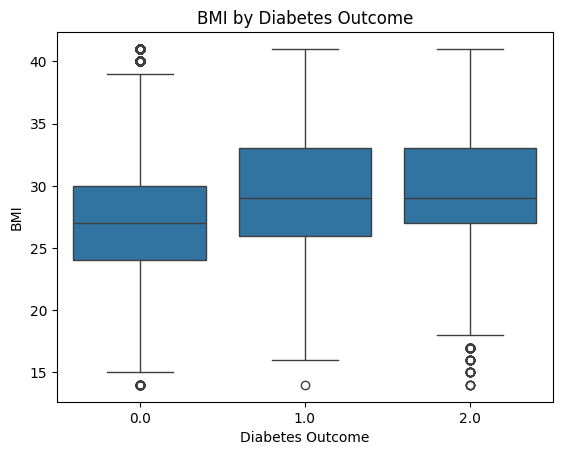

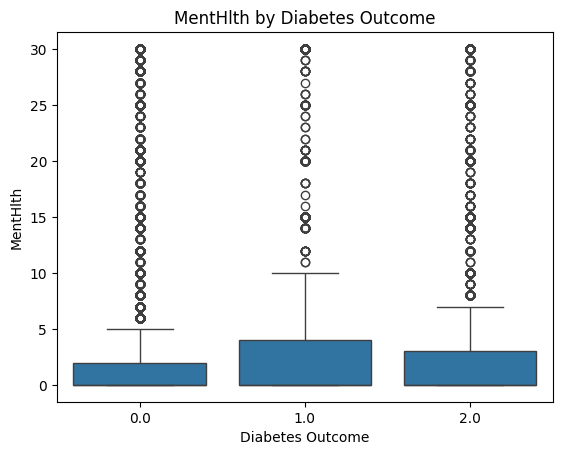

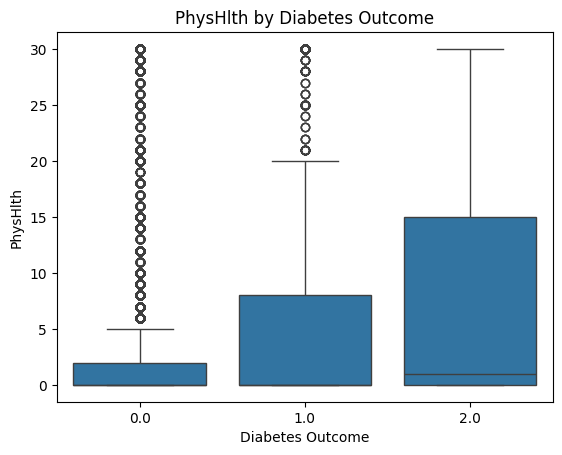

In [ ]:
import seaborn as sns

# Continuous Features vs Diabetes Outcome

for col in ['BMI', 'MentHlth', 'PhysHlth']:
    sns.boxplot(x='Diabetes_012', y=col, data=df)
    plt.title(f'{col} by Diabetes Outcome')
    plt.xlabel('Diabetes Outcome')
    plt.ylabel(col)
    plt.show()

In all these graphs, the x-axis represents the Diabetes Outcome where 0.0 represents no diabetes, 1.0 represents pre-diabetes, and 2.0 represents diabetes. All the y-axis represents the frequencies.

In the "BMI by Diabetes Outcome," it seems like people with pre-diabetes and diabetes tends to have a higher BMI than people with no diabetes since the upper quartile, median, and lower quartile of those with pre-diabetes and diabetes are higher than those with no diabetes.

In the "MentHlth by Diabetes Outcome," it seems like people with pre-diabetes and diabetes tends to have more days where their mental health are not good compared to people with no diabetes since the upper quartile and maximum of people with pre-diabetes and diabetes are higher than those with no diabetes.

In the "PhysHlth by Diabetes Outcome," it seems like people with pre-diabetes and particularlly diabetes tend to havae more days where their physical health are not good compared to people with no diabetes since the upper quartile and maximum of people with pre-diabetes and diabetes are higher than those with no diabetes. Additionally, people with diabetes have a higher median than those with no diabetes and pre-diabetes.

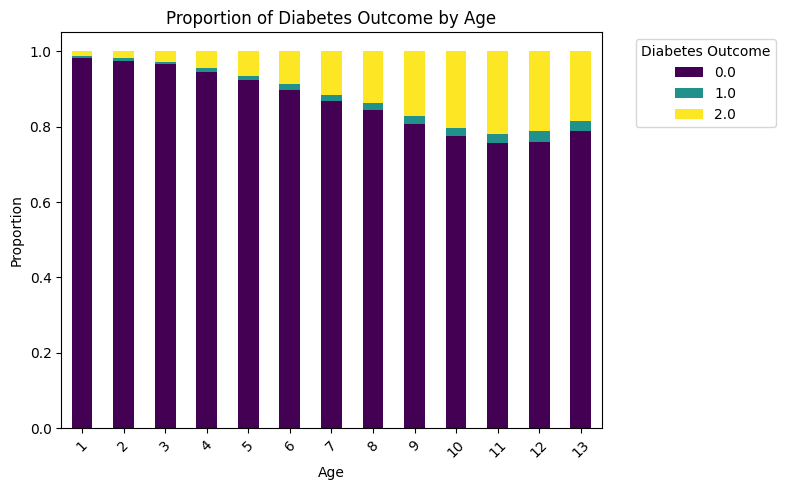

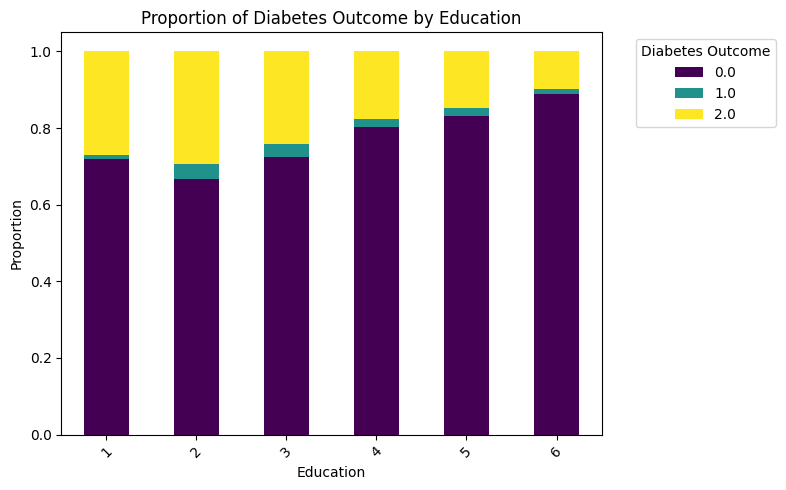

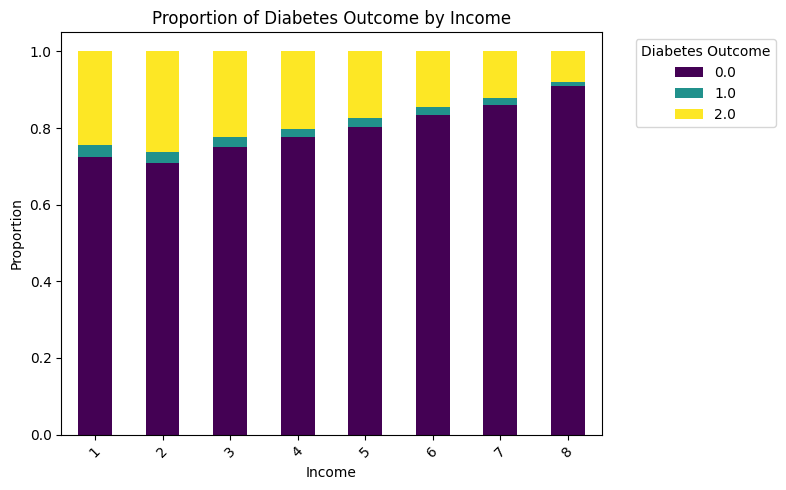

In [ ]:
# Ordinal Features vs Diabetes Outcome
ordinal_cols = ['Age', 'Education', 'Income']

for col in ordinal_cols:
    # Create a normalized cross-tab (proportions per group)
    prop_df = pd.crosstab(df[col], df['Diabetes_012'], normalize='index')

    # Plot stacked bar chart
    prop_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
    plt.title(f'Proportion of Diabetes Outcome by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Diabetes Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In all these graphs, purple represents no diabetes, blue represents pre-diabetes, and yellow represents diabetes.

In the "Proportion of Diabetes Outcome by Age," where the x-axis is represented by Age and 1 represents lower age groups and 13 represents higher age groups, it seems like people in the higher age groups have a higher chance of getting pre-diabetes and diabetes as the proportion of people getting pre-diabetes and diabetes increases as the age groups increases.

In the "Proportion of Diabetes Outcome by Education," where the x-axis is represented by Education and 1 represents lower levels of education and 6 represents higher levels of education, it seems like people with lower levels of education have a higher chance of getting diabetes than those with higher levels of education as the proportion of people with diabetes generally decreases as the level of education increases.

In the "Proportion of Diabetes Outcome by Income," where the x-axis is represented by Income and 1 represents lower income levels and 8 represents higher income levels, it seems like people with lower income levels seem to have a higher chance of getting diabetes than those with higher income levels. Additionally, it seems like as the income levels increase, the proportion of people who have diabetes decreases nearly linearly.

**Question 4a — (20 points)**

- Perform significance tests to determine if the patterns that are detected above are statistically significant. <u>Ensure that you discuss at least three patterns and the respective p-values</u>.
- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. <u>Do not arbitrarily select features.</u>
- Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [ ]:
from scipy.stats import chi2_contingency

#using chi2 for comparing categorial features to diabetes category

categorical_cols = df.select_dtypes(include='category').columns


for col in categorical_cols:
    contingency_table = pd.crosstab(df['Diabetes_012'], df[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'The Chi2 of Diabetes and {col} is: {chi2} have p_value of {p_value}' )


The Chi2 of Diabetes and Diabetes_012 is: 507360.0 have p_value of 0.0
The Chi2 of Diabetes and HighBP is: 18794.644052016425 have p_value of 0.0
The Chi2 of Diabetes and HighChol is: 11258.920399414841 have p_value of 0.0
The Chi2 of Diabetes and CholCheck is: 1173.749357770035 have p_value of 1.3291236675197173e-255
The Chi2 of Diabetes and Smoker is: 1010.5117511111928 have p_value of 3.7167324294119075e-220
The Chi2 of Diabetes and Stroke is: 2916.75197962113 have p_value of 0.0
The Chi2 of Diabetes and HeartDiseaseorAttack is: 8244.88910662167 have p_value of 0.0
The Chi2 of Diabetes and PhysActivity is: 3789.3014625427318 have p_value of 0.0
The Chi2 of Diabetes and Fruits is: 454.3470587241542 have p_value of 2.1867028126650155e-99
The Chi2 of Diabetes and Veggies is: 893.8419053866104 have p_value of 8.029645985781328e-195
The Chi2 of Diabetes and HvyAlcoholConsump is: 850.3240478355594 have p_value of 2.2619296719502035e-185
The Chi2 of Diabetes and AnyHealthcare is: 69.077976

**HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, and Sex are are statiscally signficant because they have a p_value less than 0.05.**

In [ ]:
from scipy.stats import f_oneway

#using anova for comparing continus numeric features to diabetes category

for col in ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']:
    compare = [df[df['Diabetes_012'] == i][col] for i in [0, 1, 2]]
    f_stat, pa_value = f_oneway(*compare)
    print(f'The one-way Anova of Diabetes and {col} is: {f_stat} have p_value of {pa_value}')

The one-way Anova of Diabetes and BMI is: 5851.0594339715435 have p_value of 0.0
The one-way Anova of Diabetes and MentHlth is: 717.1173715522025 have p_value of 2.735178567403e-311
The one-way Anova of Diabetes and PhysHlth is: 4078.699854188424 have p_value of 0.0
The one-way Anova of Diabetes and Age is: 4560.441067888013 have p_value of 0.0
The one-way Anova of Diabetes and Education is: 2245.7257303407528 have p_value of 0.0
The one-way Anova of Diabetes and Income is: 3913.7529543345972 have p_value of 0.0


**BMI, MentHlth, PhysHlth, Age, Education, and Income are statiscally signficant because they have a p_value less than 0.05**

**[Optional] Question 4b — (10 points)**

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following

- (1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.

OR
- (2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

Option 2 Is selected for this optional question

In [ ]:
from scipy import stats

## TEST 1: Kruskal-Wallis H-Test
# Group data by diabetes status
group0 = df[df['Diabetes_012'] == 0]['BMI']
group1 = df[df['Diabetes_012'] == 1]['BMI']
group2 = df[df['Diabetes_012'] == 2]['BMI']

# Perform Kruskal-Wallis H-test
kw_statistic, kw_pvalue = stats.kruskal(group0, group1, group2)

print(f"Kruskal-Wallis H-statistic: {kw_statistic:.4f}")
print(f"p-value: {kw_pvalue:.10f}")

# Interpret the result
if kw_pvalue < 0.05:
    print("Conclusion: BMI distribution is significantly different across diabetes groups")
else:
    print("Conclusion: No significant difference in BMI distribution across diabetes groups")

# Visualize the differences with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('BMI')
plt.savefig('bmi_diabetes_boxplot.png')
plt.close()

# Calculate median BMI for each group
print("\nMedian BMI by group:")
print(f"No Diabetes: {group0.median():.2f}")
print(f"Prediabetes: {group1.median():.2f}")
print(f"Diabetes: {group2.median():.2f}")

Kruskal-Wallis H-statistic: 10931.4948
p-value: 0.0000000000
Conclusion: BMI distribution is significantly different across diabetes groups



Median BMI by group:
No Diabetes: 27.00
Prediabetes: 29.00
Diabetes: 29.00


In [ ]:
## TEST 2
# Point-biserial correlation is calculated using Pearson correlation
pointbiserial_corr, pb_pvalue = stats.pointbiserialr(df['BMI'], df['HighBP'])

print(f"Point-Biserial Correlation Coefficient: {pointbiserial_corr:.4f}")
print(f"p-value: {pb_pvalue:.10f}")

# Interpret the result
if pb_pvalue < 0.05:
    if pointbiserial_corr > 0:
        print("Conclusion: Higher BMI is significantly associated with higher prevalence of high blood pressure")
    else:
        print("Conclusion: Higher BMI is significantly associated with lower prevalence of high blood pressure")
else:
    print("Conclusion: No significant association between BMI and high blood pressure")

# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.violinplot(x='HighBP', y='BMI', data=df)
plt.title('BMI Distribution by High Blood Pressure Status')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.savefig('bmi_highbp_violinplot.png')
plt.close()

# Mean BMI for each group
print("\nMean BMI by high blood pressure status:")
print(f"No High BP: {df[df['HighBP'] == 0]['BMI'].mean():.2f}")
print(f"High BP: {df[df['HighBP'] == 1]['BMI'].mean():.2f}")

Point-Biserial Correlation Coefficient: 0.2200
p-value: 0.0000000000
Conclusion: Higher BMI is significantly associated with higher prevalence of high blood pressure

Mean BMI by high blood pressure status:
No High BP: 26.62
High BP: 28.78


Based on the statistical tests, it is recommended to include both BMI and high blood pressure in the diabetes prediction model. The Kruskal-Wallis test shows BMI differs significantly between diabetes groups, with diabetic patients having noticeably higher BMI values. Similarly, the Point-Biserial test confirms high blood pressure is significantly related to diabetes risk. Since these two factors are connected but each contributes unique information, it is recommended to use both separately while looking for overlap, or creating a combined risk score that captures how these factors work together to increase diabetes risk.

**Question 5 — (5 points)**

- Partition the data into train/test sets. After which, perform the following:
  - encode any categorical data. Ensure that categorical variables are represented correctly.
  - normalize numeric data.
  - Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.iloc[:,1:]
Y = df['Diabetes_012']


x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

# For numeric columns
numeric_columns = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'Income']

# For categorical columns
categorical_columns = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'Sex']

# Make sure categorical columns are properly formatted before scaling
# Convert categorical columns to numeric if they're already Categorical dtype
for col in categorical_columns:
    if x_train[col].dtype.name == 'category':
        x_train[col] = x_train[col].astype(float)
        x_test[col] = x_test[col].astype(float)

# Now normalize the numeric columns using standard scaling
scaler = StandardScaler()
x_train_scaled_numeric = scaler.fit_transform(x_train[numeric_columns])
x_test_scaled_numeric = scaler.transform(x_test[numeric_columns])

# Create pandas DataFrames with the scaled numeric data
x_train_scaled_numeric_df = pd.DataFrame(x_train_scaled_numeric,
                                        columns=numeric_columns,
                                        index=x_train.index)
x_test_scaled_numeric_df = pd.DataFrame(x_test_scaled_numeric,
                                       columns=numeric_columns,
                                       index=x_test.index)

# Combine the scaled numeric data with the categorical columns
x_train_final = pd.concat([x_train_scaled_numeric_df, x_train[categorical_columns]], axis=1)
x_test_final = pd.concat([x_test_scaled_numeric_df, x_test[categorical_columns]], axis=1)

#do not have to encode y_train and y_test because it is already in 0,1, and 2.

**Question 6 — (30 points)**

- Build the ML model that predicts the target variable based on the selected features. Ensure that you:
  - Demonstrate the **training, evaluation and tuning** for <u>at least three algorithms that can handle non linear data and multiple input features/variables.</u> NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
  - Use GridSearchCV to tune <>at least two hyperparameters **for each algorithm**.</u>
  - Note: do not change the input features in your experiments.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
from sklearn.neural_network import MLPClassifier
import numpy as np

In [ ]:
#took too long
#knn
# knn = KNeighborsClassifier()
# knn_params = {
#     'n_neighbors': [2, 5, 10, 20, 40],
#     'weights': ['uniform', 'distance'],
# }
# knn_grid = GridSearchCV(knn, knn_params, cv=5)
# knn_output = knn_grid.fit(x_train_final, y_train)
# print(f'Best KNN parameters: {knn_output.best_params_}')
# print(f'Best KNN cross-validated score: {knn_output.best_score_:.2f}')

#took too long
#svm
# from sklearn.svm import SVC
# svc_params = {
#     'C': np.logspace(-3, 2, 5),
#     'gamma': np.logspace(-5, 2, 5),
#     'kernel': ['rbf']
# }
# svm = SVC()
# svm_grid = GridSearchCV(svm, svc_params, cv=5)
# svm_output = svm_grid.fit(x_train_final, y_train)

# print(f' best svm parameters for svm is : {svm_output.best_params_}')
# print(f'best svm score svm is : {svm_output.best_score_:.2f}')

#naive bayes
from sklearn.naive_bayes import GaussianNB
gass = GaussianNB()
gas_params = {
    'var_smoothing': np.logspace(-5, 1, 5)
}
gass_grid = GridSearchCV(gass, gas_params, cv=5)
gass_output = gass_grid.fit(x_train_final, y_train)
print(f'Best native bayes parameters: {gass_output.best_params_}')
print(f'Best native bayes score: {gass_output.best_score_:.2f}')

#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [1,200],
    'max_depth': [2, 20],
}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_output = rf_grid.fit(x_train_final, y_train)
print(f'Best RF parameters: {rf_output.best_params_}')
print(f'Best RF cross-validated score: {rf_output.best_score_:.2f}')

# MLP model and parameter grid
mlp = MLPClassifier(max_iter=300, random_state=42, early_stopping=True, validation_fraction=0.1)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Grid search
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5)
mlp_output = mlp_grid.fit(x_train_final, y_train)

# Best parameters and score
print(f'Best MLP parameters: {mlp_output.best_params_}')
print(f'Best MLP cross-validated score: {mlp_output.best_score_:.2f}')

Best native bayes parameters: {'var_smoothing': np.float64(10.0)}
Best native bayes score: 0.8421436455466343
Best RF parameters: {'max_depth': 2, 'n_estimators': 1}
Best RF cross-validated score: 0.8421436455466343
Best MLP parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best MLP cross-validated score: 0.84


**Question 7 — (15 points)**

- Analyze the evaluated models. For each algorithm, ensure that you:
  - Display: 1) the best model and 2) the best score that was obtained.
  - Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
    - NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

In [ ]:
# List of model names and their corresponding GridSearchCV objects
models = {
    "Random Forest": rf_grid,
    # "SVM": svm_grid,
    "Naive Bayes": gass_grid,
    # "KNN": knn_grid,
    "MLP": mlp_grid
}

# Evaluate each model
for name, grid in models.items():
    print(f"----- {name} -----")

    # Best model and best score
    print("Best Parameters:", grid.best_params_)
    print("Best Cross-Validated Score (Training):", grid.best_score_)

    # Predictions
    y_train_pred = grid.predict(x_train_final)
    y_test_pred = grid.predict(x_test_final)

    # Scores
    print("\nTrain Set Evaluation:")
    print(classification_report(y_train, y_train_pred, zero_division=0))

    print("Test Set Evaluation:")
    print(classification_report(y_test, y_test_pred, zero_division=0))

    # Show confusion matrix
    print("Confusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_test_pred))
    print("\n")


----- Random Forest -----
Best Parameters: {'max_depth': 2, 'n_estimators': 1}
Best Cross-Validated Score (Training): 0.8421436455466343

Train Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91    170908
         1.0       0.00      0.00      0.00      3687
         2.0       0.00      0.00      0.00     28349

    accuracy                           0.84    202944
   macro avg       0.28      0.33      0.30    202944
weighted avg       0.71      0.84      0.77    202944

Test Set Evaluation:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.00      0.00      0.00      6997

    accuracy                           0.84     50736
   macro avg       0.28      0.33      0.31     50736
weighted avg       0.71      0.84      0.77     50736

Confusion Matrix (Test Set):
[[42795     0     0]
 [  944

As this is healthcare data, it's important to focus on recall and F1-score, especially for the minority classes (1 and 2), since missing at-risk cases can be harmful to patients. While all three models had similar overall accuracy (~84–85%), both Random Forest and Naive Bayes completely failed to identify any instances of classes 1 and 2, showing high bias. The MLP model performed slightly better as it correctly predicted some cases of class 2 with a recall of 0.11 and an F1-score of 0.18, making it the best option among the three. However, all models were poor with class imbalance, and further steps like oversampling or using class weights are needed to improve performance.

**Question 8 — (5 points)**

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
- Note: you are welcome to use libraries to perform the analysis.

This machine learning option can help identify individuals at risk of adverse healthcare outcomes, enabling earlier interventions and improved resource allocation. Patients benefit from better care and potentially life-saving decisions, while healthcare providers gain tools for smarter planning. However, if the model is biased or inaccurate for certain groups, it could lead to unequal care or misdiagnosis. While the machine learning models generally performed well in terms of accuracy, a deeper look at predictions by sex reveals potential bias. The model tends to predict the majority class (0.0) far more frequently, which can lead to underdiagnosis or missed intervention opportunities, especially for patients in minority classes (1.0 and 2.0). When comparing predictions by sex, we need to make sure that both male and female individuals are treated fairly by the model. This is especially critical in healthcare, where biased predictions can directly impact someone’s well-being or access to care.

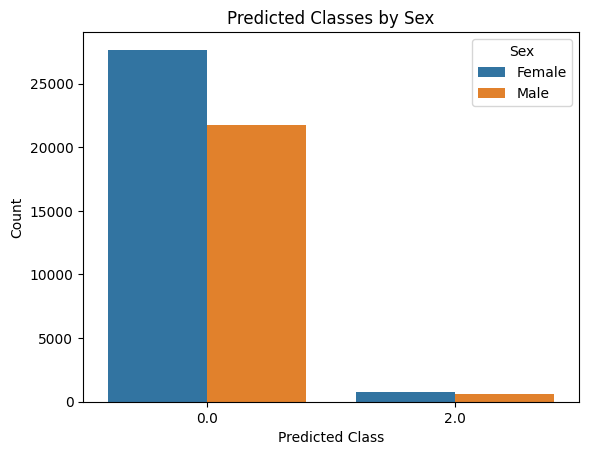

In [ ]:
# Add predicted and true labels to test set
x_test_with_preds = x_test_final.copy()
x_test_with_preds['true_label'] = y_test
x_test_with_preds['pred_label'] = mlp_output.predict(x_test_final)
x_test_with_preds['Sex'] = x_test_final['Sex']

# Visualize predicted class distribution by Sex
sns.countplot(data=x_test_with_preds, x='pred_label', hue='Sex')
plt.title('Predicted Classes by Sex')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

The graph suggests that the model is heavily biased toward predicting the majority class, and that both sexes are affected, however the impact might differ in severity. In healthcare data, failing to identify higher-risk patients (classes 1 and 2) can lead to serious errors like missed care or late diagnosis.

**Note:**

- Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
- Use markdown cells to explain your observations about the data.
- Include the names of all teammates on all submissions
- Ensure that your Python code is in a code cell and that it executes without errors.